### Задание

Самостоятельно напишите нейронную сеть, которая может стать составной частью системы бота для игры в "Крестики-нолики". Используя подготовленную базу изображений, создайте и обучите нейронную сеть, распознающую две категории изображений: крестики и нолики. Добейтесь точности распознавания более 95% (accuracy)


In [1]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
from PIL import Image
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [2]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

'hw_pro.zip'

In [3]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_pro.zip

In [4]:
# Путь к директории с базой
base_dir = '/content/hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (102, 20, 20, 1)
Размер массива y_train (102,)


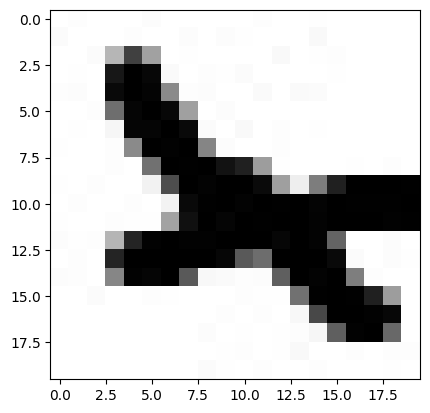

In [6]:
# Номер картинки
n = 100

# Отрисовка картинки
plt.imshow(x_train[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [7]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train_r = x_train.reshape(x_train.shape[0], -1)
# Проверка результата
print(f'Форма обучающих данных: {x_train.shape} -> {x_train_r.shape}')

Форма обучающих данных: (102, 20, 20, 1) -> (102, 400)


In [8]:
# Нормализация входных картинок
# Преобразование x_train_r в тип float32 (числа с плавающей точкой) и нормализация
x_train_r = x_train_r.astype('float32') / 255.

In [9]:
# Задание константы количества распознаваемых классов
CLASS_COUNT = 2

In [10]:
y_train_r = utils.to_categorical(y_train, CLASS_COUNT)
# Вывод формы y_train_r
# 300 примеров, каждый длины 3 по числу классов
print(y_train_r.shape)

(102, 2)


In [17]:
# Создание последовательной модели
model = Sequential()
# Добавление полносвязного слоя на 10 нейронов с relu-активацией
model.add(Dense(5000, input_dim=400, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [18]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Вывод структуры модели
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5000)                │       2,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │          10,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,015,002 (7.69 MB)

 Trainable params: 2,015,002 (7.69 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
model.fit(x_train_r,        # обучающая выборка, входные данные
          y_train_r,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5571 - loss: 2.3767
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5218 - loss: 1.0290 
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9572 - loss: 0.2113 
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.1483 
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9695 - loss: 0.1380 
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0753 
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0580  
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0431 
Epoch 9/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0276 
Epoch 10/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0295 
Epoch 11/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0224 
Epoch 12/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

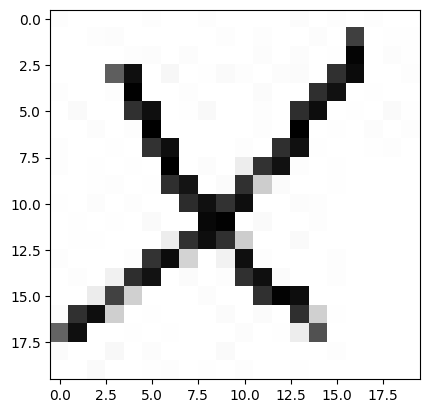

In [20]:
# Номер тестового изображения
n_rec = np.random.randint(x_train.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_train[n_rec], cmap='gray')
plt.show()

In [21]:
# Выбор нужной картинки из тестовой выборки
x = x_train_r[n_rec]
# Проверка формы данных
print(x.shape)
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)
# Проверка формы данных
print(x.shape)

(400,)
(1, 400)


In [22]:
# Распознавание примера
prediction = model.predict(x)
# Вывод результата - вектор из 10 чисел
print(prediction)
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознан класс: {pred}')
# Вывод правильного ответа для сравнения
print(f'Класс изображения: {y_train[n_rec]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
[[0.00413297 0.995867  ]]
Распознан класс: 1
Класс изображения: 1
